# Import Libraries

In [1]:
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Download Data

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [4]:
data_dir

'.\\datasets\\flower_photos'

In [3]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [6]:
image_count=len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

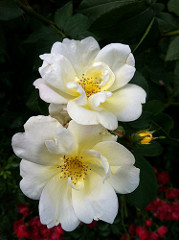

In [8]:
PIL.Image.open(str(roses[0]))

In [4]:
flowers_image_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))    
}

In [5]:
flowers_label_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
}

In [11]:
img=cv2.imread(str(flowers_image_dict['roses'][0]))
img.shape

(240, 179, 3)

# Creating feature and target datasets

In [6]:
X,y=[],[]
for flower_name,images in flowers_image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

In [7]:
X=np.array(X)
y=np.array(y)

# Splitting datasets into train and test datasets 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)

In [15]:
len(X_train)

2752

In [16]:
len(X_test)

918

# Scaling Data

In [9]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

# Training CNN

In [10]:
model=keras.Sequential([
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

model.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 10s 29ms/step - loss: 1.4198 - accuracy: 0.4008
Epoch 2/30
86/86 [==============================] - 2s 29ms/step - loss: 1.0595 - accuracy: 0.5694
Epoch 3/30
86/86 [==============================] - 2s 29ms/step - loss: 0.9051 - accuracy: 0.6384
Epoch 4/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7082 - accuracy: 0.7224
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.5327 - accuracy: 0.8034
Epoch 6/30
86/86 [==============================] - 2s 29ms/step - loss: 0.3590 - accuracy: 0.8663
Epoch 7/30
86/86 [==============================] - 2s 29ms/step - loss: 0.1965 - accuracy: 0.9313
Epoch 8/30
86/86 [==============================] - 2s 29ms/step - loss: 0.1191 - accuracy: 0.9684
Epoch 9/30
86/86 [==============================] - 2s 29ms/step - loss: 0.0590 - accuracy: 0.9858
Epoch 10/30
86/86 [==============================] - 2s 28ms/step - loss: 0.0872 - accuracy: 0.9742
Epoch 11

In [11]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 31ms/step - loss: 2.2876 - accuracy: 0.6558


[2.2876131534576416, 0.655773401260376]

We are getting an accuracy of 65.5%

In [12]:
predictions=model.predict(X_test_scaled)
predictions[:5]

29/29 [==============================] - 0s 11ms/step


array([[  9.50028   ,  24.542011  ,   2.4483593 , -14.169292  ,
         10.1924925 ],
       [ 10.331075  ,   1.6945426 ,  -9.6044445 ,  -4.4388685 ,
          8.516288  ],
       [ -4.656655  ,   0.35604447,  19.032452  , -11.997623  ,
         -1.9227905 ],
       [ 13.412079  ,   6.5959053 , -12.560484  ,  -1.7366467 ,
         10.847448  ],
       [ -0.5671465 ,  -0.28743201,  10.721376  ,   4.434252  ,
          3.1260328 ]], dtype=float32)

In [13]:
score=tf.nn.softmax(predictions[0])
predict=np.argmax(score)
predict

1

In [ ]:
y_test[0]

1

# Creating Data Augmentation Layer

In [10]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
        keras.layers.RandomZoom(0.1),
    ]
)

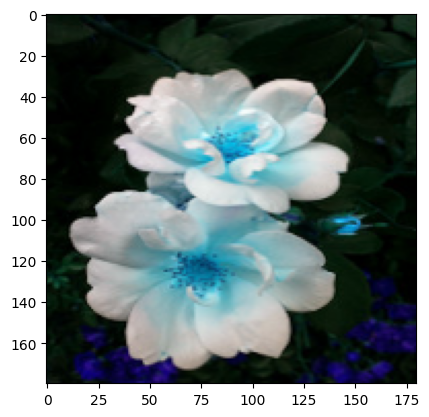

In [ ]:
plt.imshow(X[0])

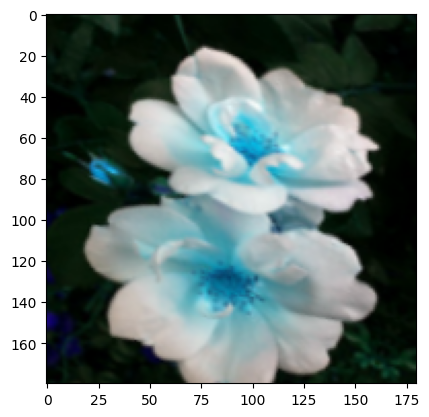

In [ ]:
plt.imshow(data_augmentation(X[0]).numpy().astype('uint8'))

# Training CNN with Data Augmentation and Dropout Layer

In [11]:
model2=keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(5)
])

model2.compile(
    optimizer='adam',
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model2.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 25s 162ms/step - loss: 1.3758 - accuracy: 0.3997
Epoch 2/30
86/86 [==============================] - 13s 156ms/step - loss: 1.0276 - accuracy: 0.5952
Epoch 3/30
86/86 [==============================] - 12s 135ms/step - loss: 0.9093 - accuracy: 0.6421
Epoch 4/30
86/86 [==============================] - 11s 133ms/step - loss: 0.8552 - accuracy: 0.6708
Epoch 5/30
86/86 [==============================] - 11s 132ms/step - loss: 0.8361 - accuracy: 0.6751
Epoch 6/30
86/86 [==============================] - 11s 131ms/step - loss: 0.7681 - accuracy: 0.7104
Epoch 7/30
86/86 [==============================] - 11s 132ms/step - loss: 0.7101 - accuracy: 0.7206
Epoch 8/30
86/86 [==============================] - 11s 130ms/step - loss: 0.6566 - accuracy: 0.7482
Epoch 9/30
86/86 [==============================] - 11s 133ms/step - loss: 0.6303 - accuracy: 0.7678
Epoch 10/30
86/86 [==============================] - 11s 132ms/step - loss: 0.5993 - accura

In [12]:
model2.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 1.1460 - accuracy: 0.7342


[1.1459946632385254, 0.7342047691345215]

We are getting 73.4% accuracy